# 9주차 : 그래프 알고리즘

- <a href="#1.그래프소개">1. 그래프 소개</a>
- <a href="#2.그래프표현">2. 그래프 표현</a>
- <a href="#3.그래프탐색">3. 그래프 탐색</a>
- <a href="#4.최소스패닝트리알고리즘">4. 최소 스패닝 트리 알고리즘</a>

------------------------------

## 1. 그래프 알고리즘

### 라이브러리 설치 및 기본 설정

In [ ]:
!pip install networkx

In [ ]:
!pip install matplotlib

In [ ]:
# korean font 
# Colab: NanumGothic, Mac: AppleGothic, 윈도우: Malgun Gothic
fontname = 'Malgun Gothic'
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': fontname,
                     'font.size': 12,
                     'figure.figsize': (5, 3),
                     'axes.unicode_minus':  False }) # 폰트 설정

-----

## <a name="1.그래프소개">1. 그래프 소개</a>

### networkx로 그래프 그리기

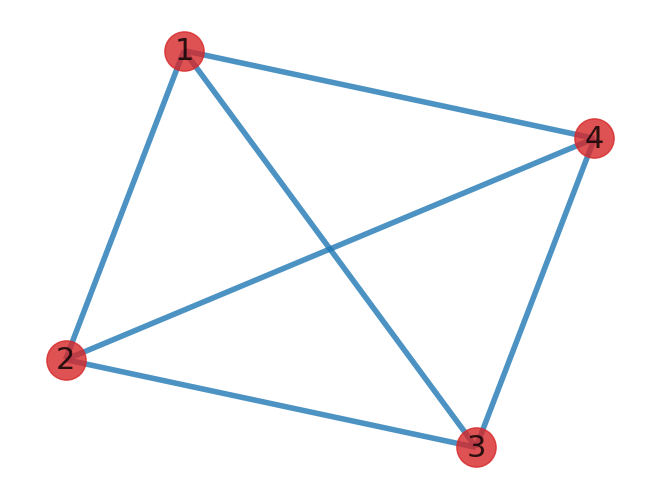

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()       # UndirectedGraph(무향 그래프)
nx.spring_layout(G)  # 노드 위치 자동 배치 
G.add_nodes_from({1,2,3,4}) # 점 추가
G.add_edges_from({(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)}) # 간선 추가

#그래프 그리기
nx.draw(G, with_labels=True, 
        node_color="tab:red", node_size=800, # 노드
        edge_color="tab:blue", width=4,      # 에지
        font_size=22, alpha=0.8)
plt.show()

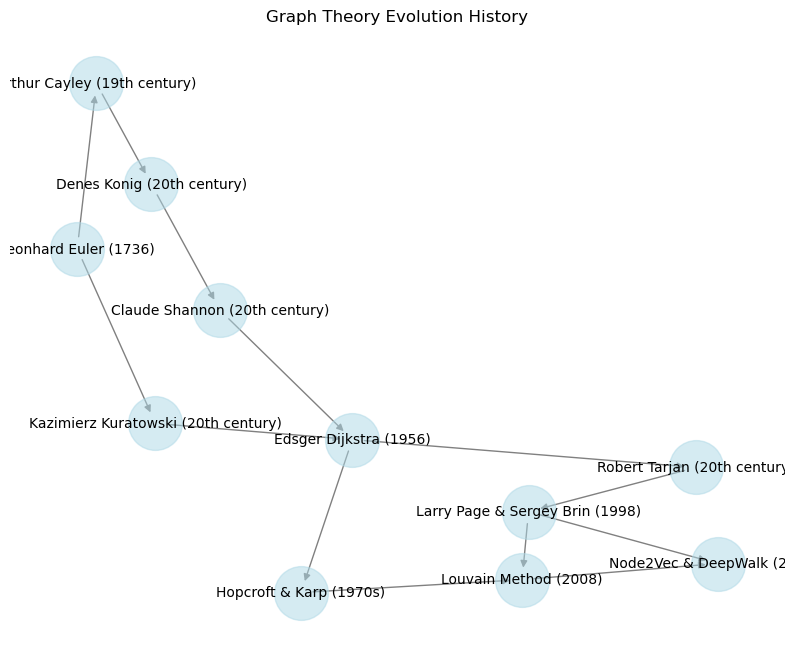

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.DiGraph()

# 노드 및 간선 데이터 추가
G.add_edges_from([
    ("Leonhard Euler (1736)", "Arthur Cayley (19th century)"),
    ("Leonhard Euler (1736)", "Kazimierz Kuratowski (20th century)"),
    ("Arthur Cayley (19th century)", "Denes Konig (20th century)"),
    ("Denes Konig (20th century)", "Claude Shannon (20th century)"),
    ("Kazimierz Kuratowski (20th century)", "Edsger Dijkstra (1956)"),
    ("Claude Shannon (20th century)", "Edsger Dijkstra (1956)"),
    ("Edsger Dijkstra (1956)", "Robert Tarjan (20th century)"),
    ("Edsger Dijkstra (1956)", "Hopcroft & Karp (1970s)"),
    ("Robert Tarjan (20th century)", "Larry Page & Sergey Brin (1998)"),
    ("Hopcroft & Karp (1970s)", "Louvain Method (2008)"),
    ("Larry Page & Sergey Brin (1998)", "Louvain Method (2008)"),
    ("Louvain Method (2008)", "Node2Vec & DeepWalk (2010s)"),
    ("Larry Page & Sergey Brin (1998)", "Node2Vec & DeepWalk (2010s)"),
])

# 그래프 레이아웃 및 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# 노드 및 간선 그리기
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="lightblue", alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray", arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10)

# 그래프 제목 및 축 제거
plt.title("Graph Theory Evolution History")
plt.axis("off")
plt.show()

### [실습문제] networkx로 그래프 그리기
1. 무향 그래프(Undirected Graph) 
2. 유향 그래프(Directed Graph)
3. 가중치 그래프(Weight Graph)


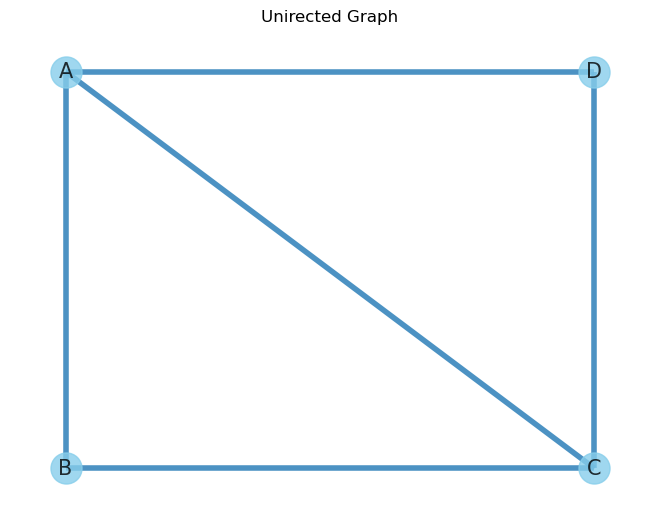

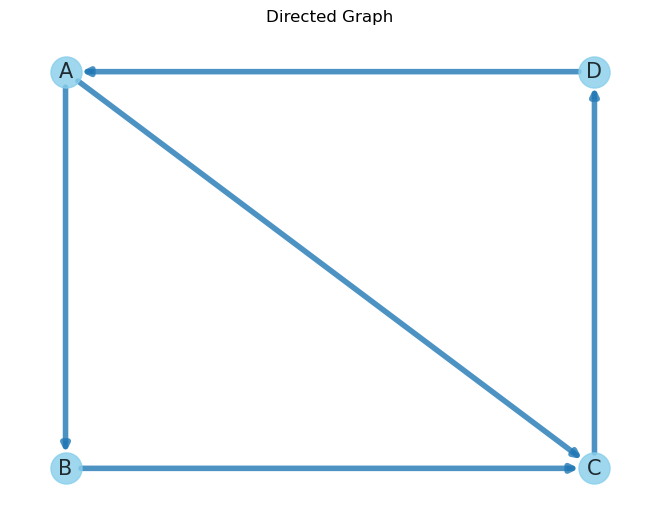

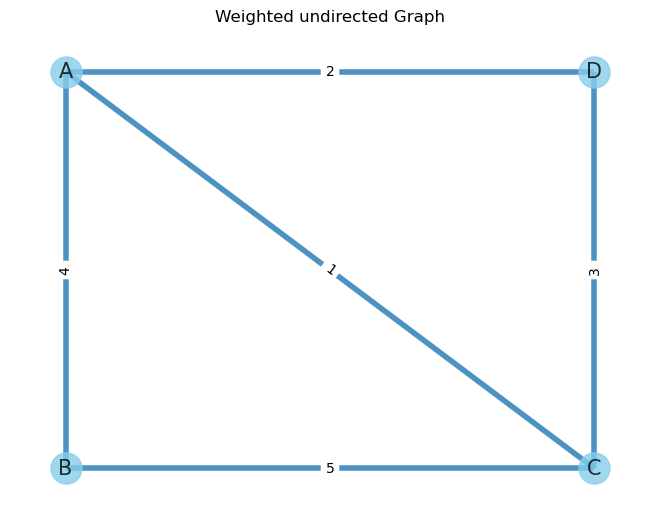

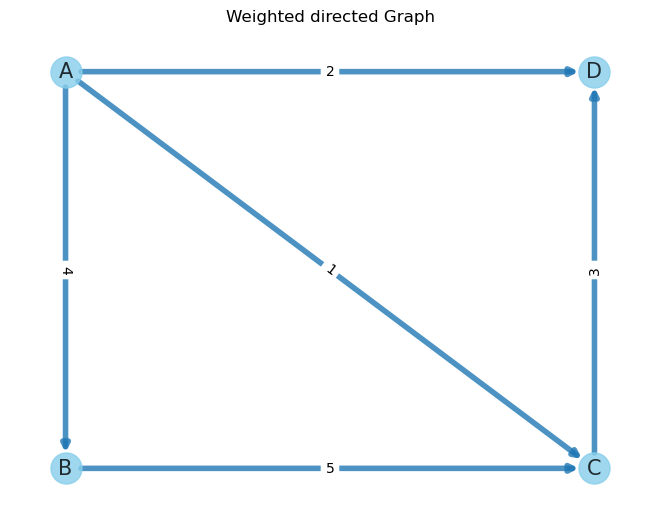

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 4))

def drawBasicGraph(E, V=False, pos=False, directed=False, weight=False, title='Graph'): 
    # 방향 그래프 여부 
    if directed: G = nx.DiGraph()  # 방향(Directed Graph)
    else: G = nx.Graph()           # 무방향(Undirected Graph)

    
    # 노드 데이터 여부(노드 정보 없어도 엣지만 있으면 그래프는 그려진다)
    if V: G.add_nodes_from(V)       # 노드 추가

    
    # 가중치 있는 간선 여부
    if weight: G.add_weighted_edges_from(E)   # 가중치 있는 간선
    else: G.add_edges_from(E)            # 가중치 없는 간선

    
    # 노드 고정 여부
    if not pos:  
        pos = nx.spring_layout(G)  # 노드 위치 자동 배치
        
    # 그래프 그리기     
    nx.draw(G, pos, with_labels=True, 
            node_color='skyblue', node_size=500, # 노드
            edge_color="tab:blue", width=4,      # 에지
            font_size=15, alpha=0.8)

    if weight:         
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(title)
    plt.show()



Vertex = {'A', 'B', 'C', 'D'}
pos = {'A': (0, 0),  # 노드 위치 고정 배치 (딕셔너리 타입으로 지정), 데카르트 좌표로 어쩌구.. in 2:38
       'B': (0,-1),
       'C': (1,-1),
       'D': (1, 0) 
      }

# 1.무방향 그래프 그리기
Edges = {('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('C', 'D')}
drawBasicGraph(Edges, Vertex, pos, False, False, 'Unirected Graph')
# 2. 방향 그래프 그리기
Edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'A')]
drawBasicGraph(Edges, Vertex, pos, True, False, 'Directed Graph')
# 3. 가중치 무방향 그래프 그리기
Edges = [('A', 'B', 4), ('A', 'C', 1), ('A', 'D', 2), ('B', 'C', 5), ('C', 'D', 3)]
drawBasicGraph(Edges, Vertex, pos, False, True, "Weighted undirected Graph")
# 4. 가중치 방향 그래프 그리기
drawBasicGraph(Edges, Vertex, pos, True, True, "Weighted directed Graph")

-----

## <a name="2.그래프표현">2. 그래프 표현</a>

### 1) 인접 행렬(Adjacency Matrix)로 그래프 표현하기

In [ ]:
import numpy as np

# 인접 행렬 생성 함수
def create_adj_matrix(edges, directed=False):
    """ 엣지 리스트와 노드 인덱스로 인접 행렬을 생성하는 함수 """
    # 노드 집합을 이용하여 노드에 인덱스 부여
    nodes = sorted(set([node for edge in edges_list for node in edge]))
    node_to_index = {node: index for index, node in enumerate(nodes)}

    num_nodes = len(node_to_index)
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for edge in edges:
        start, end = node_to_index[edge[0]], node_to_index[edge[1]]
        adj_matrix[start, end] = 1
        adj_matrix[end, start] = 1  # 무방향 그래프
        if not directed:
            adj_matrix[end, start] = 1
    return adj_matrix


# 엣지 리스트 정의
edges_list = [
    ('U', 'V'),
    ('U', 'W'),
    ('W', 'Y'),
    ('V', 'W'),
    ('V', 'X')
]
# 인접 행렬 생성
adj_matrix = create_adj_matrix(edges_list)
print(adj_matrix)

### 2) 인접 리스트(Adjacency List)로 그래프 표현하기

In [ ]:
from collections import deque, defaultdict

# 인접 리스트 생성 함수
def create_adj_list(edges, directed=False):
    """ 엣지 리스트로부터 인접 리스트를 생성하는 함수 """
    adj_list = defaultdict(list)
    for edge in edges:
        start, end = edge
        adj_list[start].append(end)
        adj_list[end].append(start)  # 무방향 그래프
    return dict(adj_list)


# 예시 사용
edges_list = [
    ('U', 'V'),
    ('U', 'W'),
    ('W', 'Y'),
    ('V', 'W'),
    ('V', 'X')
]

# 인접 리스트 생성
adj_list = create_adj_list(edges_list)
print(adj_list)

### [실습문제] 인접행렬과 인접리스트로 그래프 표현하기

#### **1)인접 행렬(Adjacency Matrix)** 로 표현

#### **2)인접 리스트(Adjacency List)** 로 표현

-------------------------

## <a name="3.그래프탐색">3. 그래프 탐색</a>

### 1) 깊이 우선 탐색(DFS: Depth-First Search)

In [ ]:
import numpy as np

# 인접 행렬 생성 함수
def create_adj_matrix(edges, directed=False):
    """ 엣지 리스트와 노드 인덱스로 인접 행렬을 생성하는 함수 """
    # 노드 집합을 이용하여 노드에 인덱스 부여
    nodes = sorted(set([node for edge in edges_list for node in edge]))
    node_to_index = {node: index for index, node in enumerate(nodes)}

    num_nodes = len(node_to_index)
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for edge in edges:
        start, end = node_to_index[edge[0]], node_to_index[edge[1]]
        adj_matrix[start, end] = 1
        adj_matrix[end, start] = 1  # 무방향 그래프
        if not directed:
            adj_matrix[end, start] = 1
    return adj_matrix
    
# 깊이 우선 탐색(DFS) 함수
def dfs(vtx, adj, s, visited) :
    print(vtx[s], end=' ')   # 현재 노드는 방문 했으므로, 화면에 출력하고        
    visited[s] = True        # True로 설정    
    
    for v in range(len(vtx)) :      
        if adj[s][v] != 0 :           
            if visited[v]==False:           # 방문하지 않은 이웃 노드V가 있으면
                DFS(vtx, adj, v, visited)   # 그 노드를 시작으로 다시 DFS 호출
                

# 노드(정점)
vtx = ['U','V','W','X','Y']
edges_list = [
    ('U','V'),
    ('U','W'), 
    ('W','Y'), 
    ('V','W'), 
    ('V','X')
]
# 인접 행렬 생성
adj_matrix = create_adj_matrix(edges_list)
print(adj_matrix)

# DFS 시작
start_node = 'U'
print(f"Depth-First Search (DFS) starting from node '{start_node}':")
dfs(vtx, adj_matrix, 0, [False]*len(vtx))


### 2) 너비 우선 탐색(BFS: Breadth-First Search)
- 일반적으로 Queue 이용 (재귀 사용 안함--> 비효율적)
- BFS는 모든 가능한 경로를 동시에 탐색하면서 목표지점에 도달할 수 있는 최단 경로를 찾는데 효과적

In [ ]:
# 인접 리스트 이용 방법
from collections import deque, defaultdict

# 인접 리스트 생성
def create_adj_list(edges):
    """ 엣지 리스트로부터 인접 리스트를 생성하는 함수 """
    adj_list = defaultdict(list)
    for edge in edges:
        start, end = edge
        adj_list[start].append(end)
        adj_list[end].append(start)  # 무방향 그래프
    return dict(adj_list)

            
# 너비 우선 탐색(BFS) 함수
def bfs(adj_list, start):
    """ 인접 리스트와 시작 노드를 받아 너비 우선 탐색을 수행하는 함수 """
    visited = set()
    queue = deque([start])  # 큐에 시작 노드 추가
    visited.add(start)      # 방문 했다고 표시

    while queue:
        node = queue.popleft() # 큐의 왼쪽에서 꺼내기(deque)
        print(node, end=' ')   # 노드 출력

        for neighbor in adj_list[node]:  # 해당 노드의 인접 리스트에 있는 이웃 노드에 대해
            if neighbor not in visited:  # 방문하지 않은 노드라면
                queue.append(neighbor)   # 큐에 삽입하고 
                visited.add(neighbor)    # 방문 했다고 표시
                

# 노드(정점)
edges_list = [
    ('U', 'V'),
    ('U', 'W'),
    ('W', 'Y'),
    ('V', 'W'),
    ('V', 'X')
]

# 인접 리스트 생성
adj_list = create_adj_list(edges_list)
print(adj_list)



# BFS 수행
start_node = 'U'
print(f"Breadth-First Search (BFS) starting from node '{start_node}':")
bfs(adj_list, start_node)


### [실습문제] 그래프 탐색하기

--------------

## <a name="4.최소스패닝트리알고리즘">4. 최소 스패닝 트리 알고리즘</a>

### 스패닝 트리(Spanning tree) :  신장 트리
- Spanning Tree = 신장 트리 = 스패닝 트리
- 그래프 내 모든 정점을 포함하는 트리
- 정점 n은 n-1개의 간선을 갖는다
- 모든 정점들이 연결 되어 있어야 하고 사이클을 포함해서는 안된다.

In [ ]:
# DFS를 이용한 spanning tree(인접행렬 방식)
def st_dfs(vtx, adj, s, visited) :
    visited[s] = True               # 현재 정점 s를 visited에 추가함
    for v in range(len(vtx)) :      # 인접행렬
        if adj[s][v] != 0 :         # 모든 간선 (s,v)에 대해
            if visited[v]==False:   # v를 아직 방문하지 않았으면 
                print("(", vtx[s], vtx[v], ")", end=' ')  # 간선 출력
                st_dfs(vtx, adj, v, visited)


vtx = ['U','V','W','X','Y']
edge= [[0,  1,  1,  0,  0],
       [1,  0,  1,  1,  0],
       [1,  1,  0,  0,  1],
       [0,  1,  0,  0,  0],
       [0,  0,  1,  0,  0]]

print('spanning tree(인접행렬 방식): ', end="")
st_dfs(vtx, edge, 0, [False]*len(vtx))
print()

### 최소 스패닝 트리 (Minimum Spanning Tree)
-가중치 그래프의 여러 신장 트리 중에서 간선의 가중치 합이 최소인 트리
컴퓨터 인터넷 네트워크와 자동차 내비게이션 등에 많이 사용된다
Kruskal 알고리즘 & Prim 알고리즘

#### Prim 알고리즘

In [ ]:
# MST에 포함되지 않은 최소 dist의 정점 찾기
INF = 999
def getMinVertex(dist, selected) :
    minv = 0
    mindist = INF
    for v in range(len(dist)) :
        if selected[v]==False and dist[v]<mindist :
            mindist = dist[v]
            minv = v
    return minv


#프림의 최소 신장 트리 알고리즘
def MSTPrim(vertex, adj) :
    n = len(vertex)
    dist = [INF] * n		# dist는 MST에서 정점까지의 거리 배열
    dist[0] = 0			    # dist: [0, INF, ... INF]
    selected = [False] * n	# selected: [False, False, ... False]

    for _ in range(n) :		# n개의 정점을 MST에 추가하면 종료됨
        u = getMinVertex(dist, selected)
        selected[u] = True	# u는 이제 MST에 포함됨
        print(vertex[u], end=' ')	# u출력 
        for v in range(n) :
             # 간선 (u,v)가 있고, v ∉ MST 이면
            if adj[u][v] != INF and not selected[v] :
                if adj[u][v]< dist[v] :	# (u,v)가 dist[v]보다 작으면
                    dist[v] = adj[u][v]	# dist[v] 갱신

        print(': ', dist)	# 중간 결과 출력
    
    print()                            


# Prim의 MST 테스트 프로그램
vertex =   ['A',    'B',    'C',    'D',    'E',    'F',    'G' ]
weight = [ [0,	   25,		INF,	12,	  INF,     INF,		INF],
           [25,		0,	    10,		INF,	15,	   INF,	    INF],
           [INF,	10,		0,	    INF,	INF,	INF,	16],
           [12,	    INF,    INF,	0,      17,	    37,	    INF],
           [INF,	15,	    INF,    17,	    0,      19,		14  ],
           [INF,	INF,	INF,	37,     19,		0,	    42],
           [INF,    INF,	16,     INF,	14,		42,	    0   ]]    

print("MST By Prim's Algorithm")
MSTPrim(vertex, weight)

### networkx  nx.minimum_spanning_tree(G) 사용하기

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

vertex = ['A',    'B',    'C',    'D',    'E',    'F',    'G' ]
edges = [('A','B',25), ('A','D',12), ('B','C',10), ('B','E',15), 
         ('C','G',16), ('D','E',17), ('D','F',37), ('E','F',14),
         ('E','G',19), ('F','G',42)]
pos = {'A':(0,0),
       'B':(1,1),
       'C':(2,0),
       'D':(0,-1),
       'E':(1,-1),
       'F':(1,-2),
       'G':(2,-1),
      }

# 그래프 생성 및 엣지 추가
G = nx.Graph()
G.add_weighted_edges_from(edges)

# 최소 스패닝 트리(MST) 찾기
mst = nx.minimum_spanning_tree(G)

# 원본 그래프와 MST의 엣지를 구분하기 위한 스타일 설정
pos = nx.spring_layout(G)  # 노드 위치 자동 배치

# 원본 그래프 그리기
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# MST의 엣지를 강조하여 그리기
nx.draw_networkx_edges(mst, pos, edge_color='red', width=2)

plt.title("Minimum Spanning Tree (MST) Visualization")
plt.show()

### [실습문제] 최소 스패닝 트리 찾기

-----------------------